# Serie Image processing: post 3, Thresholding

In [76]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd

In [93]:
image1 = imread('railway.jpg') #, as_gray=True)
#image1_Gray = rgb2gray(image1)
image1_Gray = imread('railway.jpg', as_gray=True)

## Grayscale Image threshold

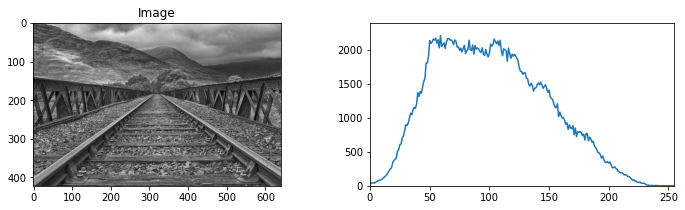

In [36]:
def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])
histGrayScale(image1_Gray)

### Thresold at 200 ... (we set the pixel to 1 if they > 200)

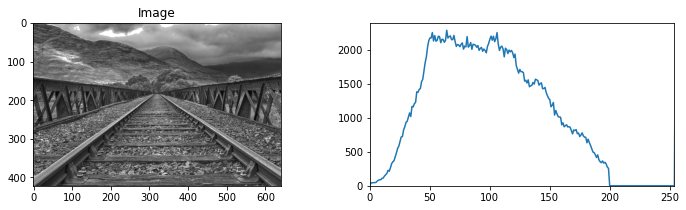

In [157]:
im = np.where(image1_Gray>200/256, 1, image1_Gray)
histGrayScale(im, 254, 2400)

### Thresold at 120 ... (we set the pixel to 1 if they > 120)

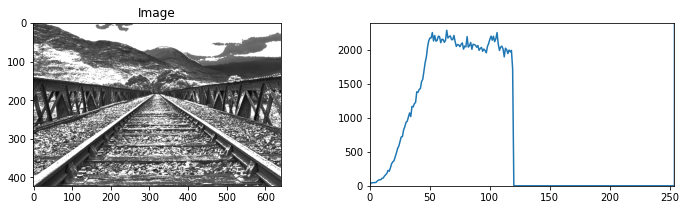

In [158]:
im = np.where(image1_Gray>120/256, 1, image1_Gray)
histGrayScale(im, 254, 2400)

### Add another threshold (remove before 50)

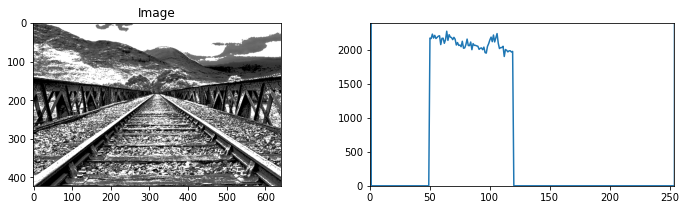

In [159]:
im = np.where(im<50/256, 0, im)
histGrayScale(im, 254, 2400)

Text(0.5, 1.0, 'Processed')

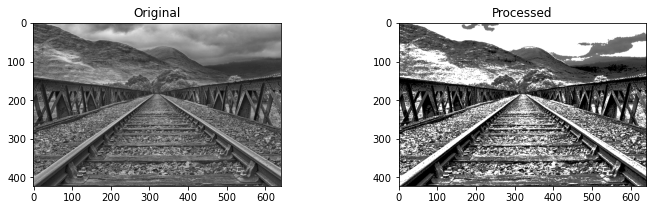

In [164]:
_, axes = plt.subplots(ncols=2, figsize=(12, 3))
axes[0].imshow(image1_Gray, cmap=plt.get_cmap('gray'))
axes[0].set_title('Original')
axes[1].imshow(im, cmap=plt.get_cmap('gray'))
axes[1].set_title('Processed')

## Channels stats

In [82]:
def RGBStats(image): 
    colors = [] 
    for i in range(0, 3): 
        max_color =np.max(image[:,:,i]) 
        min_color =np.min(image[:,:,i]) 
        mean_color = np.mean(image[:,:,i]) 
        median_color = np.median(image[:,:,i]) 
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,  
                        index = ['Red', ' Green', 'Blue'], 
                        columns = ['Min', 'Max', 'Mean', 'Median'])

RGBStats(image1)

,Min,Max,Mean,Median
Red,0,255,154.133084,175.0
Green,0,250,109.327157,109.0
Blue,0,255,87.958773,72.0


## Threshold based on mean

In [46]:
thresh = threshold_mean(image1_Gray) 
# return Upper threshold value. All pixels with an intensity higher than this value are assumed to be foreground.
print(thresh)

0.3899807790066559


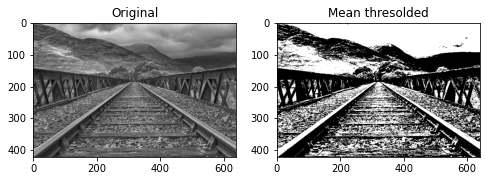

In [47]:
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    
thresholdMeanDisplay(image1_Gray)

## Threshold based on Otsu

In [43]:
thresh = threshold_otsu(image1_Gray) 
# return Upper threshold value. All pixels with an intensity higher than this value are assumed to be foreground.
print(thresh)

0.40597985677083337


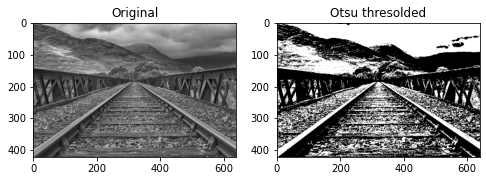

In [55]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')
    
thresholdOtsuDisplay(image1_Gray)

## Colored image channel changes

In [130]:
image1 = imread('tulip.jpg') #, as_gray=True)

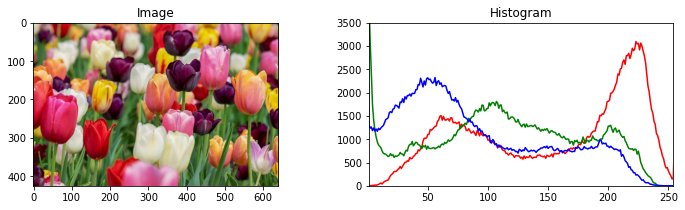

In [172]:
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
    axes[1].set_xlim([1, 254])
    axes[1].set_ylim([0, 3500])
histColor(image1)

### Display the 3 channels

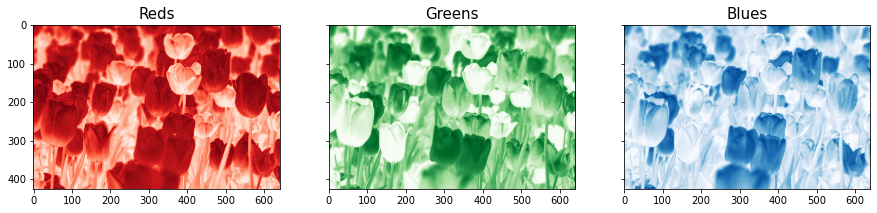

In [173]:
rgb = ['Reds','Greens','Blues'] 
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True) 
for i in range(3): 
   axes[i].imshow(image1[:,:,i], cmap = rgb[i]) 
   axes[i].set_title(rgb_list[i], fontsize = 15)

### Thresolding on green only

In [190]:
thresold_G = 150
image1_modified = image1.copy()
image1_modified[:,:,1] = np.where(image1[:,:,1]>thresold_G, 
                                  image1[:,:,1], 
                                  0)

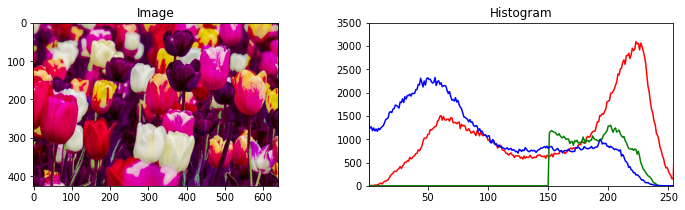

In [191]:
histColor(image1_modified)

In [171]:
RGBStats(image1)

,Min,Max,Mean,Median
Red,0,255,154.133084,175.0
Green,0,250,109.327157,109.0
Blue,0,255,87.958773,72.0


In [121]:
RGBStats(image1_modified)

,Min,Max,Mean,Median
Red,0,254,111.969021,80.0
Green,0,250,109.327157,109.0
Blue,0,254,87.958770,72.0
